In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [2]:
df = pd.read_excel(r"C:\Users\shaik\Downloads\career_dataset_large.xlsx")
df.head()

,Education Level,Specialization,Skills,Certifications,CGPA/Percentage,Recommended Career
0,Bachelor's,Finance,"Counseling, MS Office, Machine Learning",Tally ERP,67,Business Analyst
1,Intermediate,Science,"Accounting, MS Office",AWS Certified,67,Software Engineer
2,Master's,Business,"Accounting, SQL, Data Analysis",Mental Health Basics,90,Financial Analyst
3,Bachelor's,Computer Science,Communication,NaN,75,Clerk
4,Matric,Business,Data Analysis,Tally ERP,83,Sales Assistant


# EDA

In [3]:
df.isnull().sum()

Education Level         0
Specialization          0
Skills                  0
Certifications        596
CGPA/Percentage         0
Recommended Career      0
dtype: int64

In [4]:
df['Certifications'] = df['Certifications'].fillna('none')

In [5]:
df.isnull().sum()

Education Level       0
Specialization        0
Skills                0
Certifications        0
CGPA/Percentage       0
Recommended Career    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df.drop_duplicates(inplace = True,ignore_index = True)

In [8]:
df.duplicated().sum()

np.int64(0)

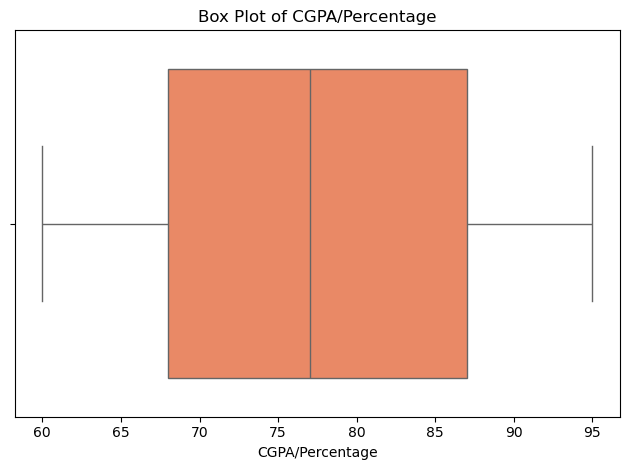

In [9]:
plt.figure()
sns.boxplot(x=df['CGPA/Percentage'], color='coral')
plt.title('Box Plot of CGPA/Percentage')
plt.xlabel('CGPA/Percentage')
plt.tight_layout()
plt.show()

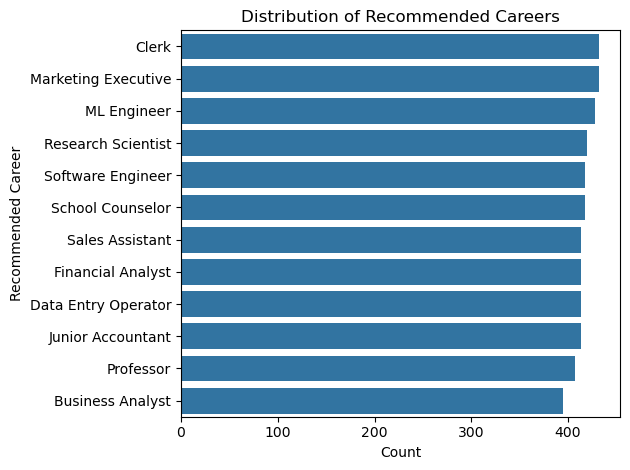

In [10]:
# Count plot for Recommended Career
plt.figure()
sns.countplot(y='Recommended Career', data=df, order=df['Recommended Career'].value_counts().index)
plt.title('Distribution of Recommended Careers')
plt.xlabel('Count')
plt.ylabel('Recommended Career')
plt.tight_layout()
plt.show()

In [11]:
df.head()

,Education Level,Specialization,Skills,Certifications,CGPA/Percentage,Recommended Career
0,Bachelor's,Finance,"Counseling, MS Office, Machine Learning",Tally ERP,67,Business Analyst
1,Intermediate,Science,"Accounting, MS Office",AWS Certified,67,Software Engineer
2,Master's,Business,"Accounting, SQL, Data Analysis",Mental Health Basics,90,Financial Analyst
3,Bachelor's,Computer Science,Communication,none,75,Clerk
4,Matric,Business,Data Analysis,Tally ERP,83,Sales Assistant


### Splitting data into train and test

In [12]:
from sklearn.model_selection import train_test_split

x = df[['Education Level','Specialization','Skills','Certifications']]
y = df['Recommended Career']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.85, random_state=100, stratify=y)

## Encoding the Target

In [13]:
lab = LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.transform(y_test)

## Lableing the features

In [14]:
ord = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_train = ord.fit_transform(x_train)
x_test = ord.transform(x_test)

## Model Building Using Random Forest

In [15]:
rand_for = RandomForestClassifier(n_estimators=200,random_state=50)
rand_for.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=50)

#### Training Validation

In [16]:
y_pred_train = rand_for.predict(x_train)
y_pred_train

array([ 3,  3,  6, ..., 10,  6,  5])

In [17]:
accuracy_score(y_train,y_pred_train)

0.9301012002824194

### Testing validation

In [18]:
y_pred_test = rand_for.predict(x_test)
y_pred_test
accuracy_score(y_pred_test,y_test)

0.07466666666666667

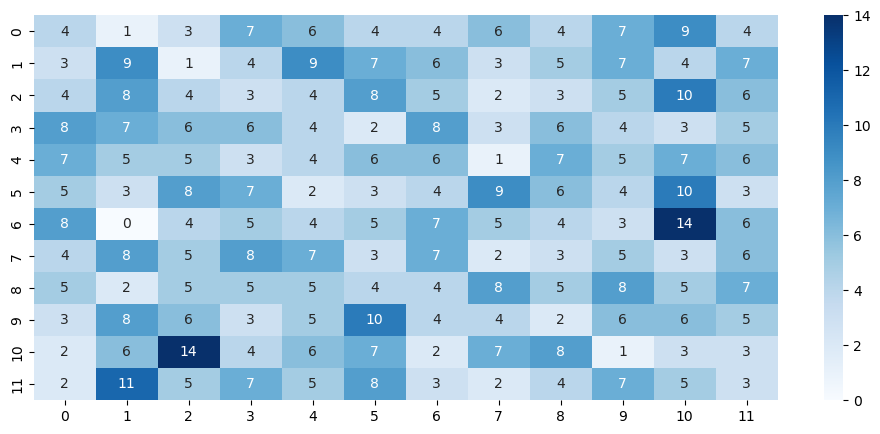

In [19]:
cf = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(12,5))
sns.heatmap(cf,annot = True,fmt = 'd',cmap='Blues')
plt.show()

In [20]:
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       335
           1       0.93      0.92      0.92       371
           2       0.92      0.92      0.92       351
           3       0.93      0.92      0.93       355
           4       0.94      0.94      0.94       349
           5       0.94      0.91      0.92       376
           6       0.94      0.95      0.94       363
           7       0.90      0.93      0.92       338
           8       0.93      0.96      0.94       346
           9       0.91      0.93      0.92       347
          10       0.95      0.95      0.95       353
          11       0.94      0.91      0.92       365

    accuracy                           0.93      4249
   macro avg       0.93      0.93      0.93      4249
weighted avg       0.93      0.93      0.93      4249



In [22]:
import pickle

with open("career_model.pkl", "wb") as f:
    pickle.dump(rand_for, f)

In [28]:
import joblib

joblib.dump(rand_for, "career_model.pkl")

['career_model.pkl']

In [29]:
joblib.dump(ord, "ordinal_encoder.pkl")

['ordinal_encoder.pkl']

In [30]:
joblib.dump(lab, "label_encoder.pkl")

['label_encoder.pkl']